 1. นายจิรภัทร เหล็กมา  Student ID : 64070501010
 2. นายพงศกร จันสนิท  Student ID : 64070501033
 3. นายพีรภัทร ปัดถาวะโร Student ID : 64070501039
 4. นายณัชพงศ์ ประมวลทรัพย์ Student ID : 64070501092

In [1]:
import pandas as pd
import numpy as np

lol_data = pd.read_csv('./2021_LoL_data.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 100)
lol_data.head()

,Team,Player,Opponent,Position,Champion,Kills,Deaths,Assists,Creep Score,Gold Earned,Champion Damage Share,Kill Participation,Wards Placed,Wards Destroyed,Ward Interactions,Dragons Get,Dragons Lose,Barons Get,Barons Lose,Result
0,UOL,Boss,GS,Top,Camille,4,5,3,188,11107,0.17,0.78,8,8,16,0,4,0,1,L
1,GS,Crazy,UOL,Top,Gwen,3,1,9,217,12201,0.20,0.52,10,7,17,4,0,1,0,W
2,UOL,Ahahacik,GS,Jungle,Trundle,2,4,5,156,9048,0.15,0.78,8,14,22,0,4,0,1,L
3,GS,Mojito,UOL,Jungle,Talon,5,4,10,194,11234,0.23,0.65,12,8,20,4,0,1,0,W
4,UOL,Nomanz,GS,Mid,Leblanc,1,3,4,216,9245,0.29,0.56,6,9,15,0,4,0,1,L


In [2]:
lol_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Team                   220 non-null    object 
 1   Player                 220 non-null    object 
 2   Opponent               220 non-null    object 
 3   Position               220 non-null    object 
 4   Champion               220 non-null    object 
 5   Kills                  220 non-null    int64  
 6   Deaths                 220 non-null    int64  
 7   Assists                220 non-null    int64  
 8   Creep Score            220 non-null    int64  
 9   Gold Earned            220 non-null    int64  
 10  Champion Damage Share  220 non-null    float64
 11  Kill Participation     220 non-null    float64
 12  Wards Placed           220 non-null    int64  
 13  Wards Destroyed        220 non-null    int64  
 14  Ward Interactions      220 non-null    int64  
 15  Dragon

In [3]:
# select the "Team" and "Player" columns from the original dataset
team_player_df = lol_data[["Team", "Player"]]

# remove duplicates to get each team and player combination only once
team_player_df = team_player_df.drop_duplicates().sort_values(by = 'Team')

# display the resulting dataframe
team_player_list = team_player_df.groupby('Team')['Player'].agg(list).reset_index()
print("There are" ,team_player_list.shape[0]," teams, and ",team_player_df.shape[0],"players")

team_player_list

There are 10  teams, and  55 players


,Team,Player
0,BYG,"[Pk, Kino, Liang, Doggo, Maoan, Husha]"
1,C9,"[Bulcan, Zven, Perkz, Fudge, Blaber, Vulcan]"
2,DFM,"[Steal, Aria, Yutapon, Gaeng, Evi]"
3,GS,"[Zergsting, Alive, Bolulu, Zersting, Mojito, Crazy]"
4,HLE,"[Chovy, Vsta, Deft, Leona, Willer, Morgan]"
5,INF,"[Solidsnake, Cody, Whitelotus, Ackerman, Buggax]"
6,LNG,"[Icon, Ale, Iwandy, Tarzan, Light]"
7,PCE,"[Aladoric, Violet, Bapip, Babip, Vizicsacsi, Tally]"
8,RED,"[Guigo, Aegis, Grevthar, Titan, Jojo]"
9,UOL,"[Santas, Argonavt, Nomanz, Ahahacik, Boss]"


In [4]:
#due to Ward Interactions is just sum of Wards Placed and Ward Destroyed
lol_data.drop('Ward Interactions',axis = 1,inplace = True)

In [5]:
# Count the number of games played by each team
games_played = lol_data['Team'].value_counts().rename('Game Played')

# Count the number of games won by each team
team_wins = lol_data.loc[lol_data['Result'] == 'W']['Team'].value_counts().rename('Wins')
team_losses = lol_data.loc[lol_data['Result'] == 'L']['Team'].value_counts().rename('Losses')

# Calculate the win rate for each team
team_win_rates = team_wins / games_played
team_win_rates.rename('Win Rate',inplace = True)

team_stats = pd.concat([games_played,team_wins,team_losses, team_win_rates], axis=1, sort=True).fillna(0)
team_stats.sort_values(by=['Wins','Losses'], ascending=[False,True],inplace =True)

# Print the results
team_stats

,Game Played,Wins,Losses,Win Rate
LNG,20,20.0,0.0,1.00
DFM,25,20.0,5.0,0.80
HLE,20,15.0,5.0,0.75
C9,25,15.0,10.0,0.60
GS,20,10.0,10.0,0.50
PCE,20,10.0,10.0,0.50
BYG,25,10.0,15.0,0.40
RED,20,5.0,15.0,0.25
UOL,25,5.0,20.0,0.20
INF,20,0.0,20.0,0.00


In [6]:
# Group the data by champion and result, and count the number of occurrences
champ_results = lol_data.groupby(['Champion', 'Result'])['Result'].count().unstack(fill_value=0)

# Calculate the number of wins and losses for each champion
champ_results['Total'] = champ_results['W'] + champ_results['L']

# Calculate the pick rate for each champion
pick_rate = lol_data['Champion'].value_counts(normalize=True)

# Calculate the win rate for each champion
champ_win_rate = champ_results['W'] / champ_results['Total']

# Merge the pick rate and win rate dataframes
champ_stats = pd.concat([pick_rate, champ_win_rate], axis=1, sort=True).fillna(0)
champ_stats.columns = ['Pick Rate', 'Win Rate']

# Add the number of picks, wins, and losses to the stats dataframe
champ_stats['Picks'] = lol_data['Champion'].value_counts()
champ_stats['Wins'] = champ_results['W']
champ_stats['Losses'] = champ_results['L']

# Sort the dataframe by win rate*pick rate in descending order
champ_stats['Pick Rate*Win Rate'] = champ_stats['Pick Rate'] * champ_stats['Win Rate']
champ_stats = champ_stats.sort_values(by='Pick Rate*Win Rate', ascending=False)
champ_stats = champ_stats[['Picks','Wins','Losses','Pick Rate','Win Rate','Pick Rate*Win Rate']]

champ_stats.head()

,Picks,Wins,Losses,Pick Rate,Win Rate,Pick Rate*Win Rate
Leona,13,12,1,0.059091,0.923077,0.054545
Miss Fortune,18,9,9,0.081818,0.500000,0.040909
Rakan,8,5,3,0.036364,0.625000,0.022727
Ezreal,9,5,4,0.040909,0.555556,0.022727
Qiyana,5,4,1,0.022727,0.800000,0.018182


In [7]:
# group the data by player and team
player_stats = lol_data.groupby(["Player", "Team"])

# compute the mean of each column for each player
player_mean = player_stats.mean()

#compute the most played champion for each player
player_most_champ = player_stats["Champion"].apply(lambda x: (x.value_counts().index[0]))
player_most_position = player_stats["Position"].apply(lambda x: (x.value_counts().index[0]))

# compute the win count and lose count for each player
player_wins = player_stats["Result"].apply(lambda x: (x == "W").sum())
player_losses = player_stats["Result"].apply(lambda x: (x == "L").sum())

# calculate the win rate for each player
player_win_rate = player_wins / (player_wins + player_losses)

# merge the results into a single DataFrame
player_results = pd.concat([player_mean, player_wins, player_losses, player_win_rate,player_most_champ,player_most_position], axis=1)

# rename the columns for clarity
player_results.columns = ["Kills mean", "Deaths mean", "Assists mean", "Creep Score mean", 
                          "Gold Earned mean", "Champion Damage Share mean", "Kill Participation mean", 
                          "Wards Placed mean", "Wards Destroyed mean", 
                          "Dragons Get mean", "Dragons Lose mean", "Barons Get mean", "Barons Lose mean",
                          "Wins", "Losses", "Win Rate","Most Played Champion","Most Played Position"]

# print the results
player_results.sort_values(by=['Wins','Losses'],ascending =[False,True],inplace =True)
player_results.head()

,,Kills mean,Deaths mean,Assists mean,Creep Score mean,Gold Earned mean,Champion Damage Share mean,Kill Participation mean,Wards Placed mean,Wards Destroyed mean,Dragons Get mean,Dragons Lose mean,Barons Get mean,Barons Lose mean,Wins,Losses,Win Rate,Most Played Champion,Most Played Position
Player,Team,,,,,,,,,,,,,,,,,,
Ale,LNG,6.50,0.75,4.0,277.50,15069.50,0.2725,0.6200,10.25,5.75,2.25,1.5,0.75,0.0,4,0,1.0,Fiora,Top
Icon,LNG,2.25,1.25,6.5,265.75,11735.25,0.2600,0.5025,9.50,4.00,2.25,1.5,0.75,0.0,4,0,1.0,Leblanc,Mid
Iwandy,LNG,0.75,0.50,9.0,39.75,7281.50,0.0500,0.5675,52.00,14.25,2.25,1.5,0.75,0.0,4,0,1.0,Leona,Support
Light,LNG,4.00,0.50,5.0,290.00,13380.75,0.2325,0.5250,12.00,11.75,2.25,1.5,0.75,0.0,4,0,1.0,Miss Fortune,Adc
Tarzan,LNG,3.75,1.50,6.5,192.75,10958.25,0.1825,0.6050,7.50,16.00,2.25,1.5,0.75,0.0,4,0,1.0,Qiyana,Jungle


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Drop irrelevant columns
lol_data_prep = lol_data.drop(["Team", "Player", "Opponent", "Position"], axis=1)

# Create dummy variables for the "Champion" column
champion_dummies = pd.get_dummies(lol_data_prep["Champion"], prefix="Champion")
lol_data_prep = pd.concat([lol_data_prep, champion_dummies], axis=1)
lol_data_prep.drop(["Champion"], axis=1, inplace=True)

# Convert "Result" column into binary values
result_dummies = pd.get_dummies(lol_data_prep["Result"])
lol_data_prep = pd.concat([lol_data_prep, result_dummies], axis=1)
lol_data_prep.drop(["Result", "L"], axis=1, inplace=True)

lol_data_prep.head()

,Kills,Deaths,Assists,Creep Score,Gold Earned,Champion Damage Share,Kill Participation,Wards Placed,Wards Destroyed,Dragons Get,Dragons Lose,Barons Get,Barons Lose,Champion_Aatrox,Champion_Akali,Champion_Alistar,Champion_Amumu,Champion_Aphelios,Champion_Azir,Champion_Bard,Champion_Braum,Champion_Camille,Champion_Draven,Champion_Ezreal,Champion_Fiora,Champion_Galio,Champion_Gangplank,Champion_Gnar,Champion_Gragas,Champion_Graves,Champion_Gwen,Champion_Irelia,Champion_Jarvan,Champion_Jax,Champion_Jayce,Champion_Jhin,Champion_Kaisa,Champion_Kalista,Champion_Karma,Champion_Kennen,Champion_Leblanc,Champion_Lee Sin,Champion_Leona,Champion_Lillia,Champion_Lissandra,Champion_Lucian,Champion_Lulu,Champion_Malphite,Champion_Miss Fortune,Champion_Nami,Champion_Nautilus,Champion_Nocturn,Champion_Olaf,Champion_Orianna,Champion_Qiyana,Champion_Rakan,Champion_Rell,Champion_Renekton,Champion_Ryze,Champion_Sejuani,Champion_Senna,Champion_Sett,Champion_Sion,Champion_Sylas,Champion_Syndra,Champion_Tahm Kench,Champion_Taliyah,Champion_Talon,Champion_Thresh,Champion_Tristana,Champion_Trundle,Champion_Tryndamere,Champion_Twisted Fate,Champion_Urgot,Champion_Wukong,Champion_Xayah,Champion_Xin Zhao,Champion_Yone,Champion_Zed,Champion_Zoe,W
0,4,5,3,188,11107,0.17,0.78,8,8,0,4,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,1,9,217,12201,0.20,0.52,10,7,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2,4,5,156,9048,0.15,0.78,8,14,0,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,5,4,10,194,11234,0.23,0.65,12,8,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1,3,4,216,9245,0.29,0.56,6,9,0,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
#copy data as unnormalized one (for the classification tree)
lol_data_prep2 = lol_data_prep.copy()

    #normalize
# Loop through each numeric column and apply Min-Max normalization
for col in lol_data_prep:
    min_val = lol_data_prep[col].min()
    max_val = lol_data_prep[col].max()
    lol_data_prep[col] = (lol_data_prep[col] - min_val) / (max_val - min_val)
    
lol_data_prep.head()

,Kills,Deaths,Assists,Creep Score,Gold Earned,Champion Damage Share,Kill Participation,Wards Placed,Wards Destroyed,Dragons Get,Dragons Lose,Barons Get,Barons Lose,Champion_Aatrox,Champion_Akali,Champion_Alistar,Champion_Amumu,Champion_Aphelios,Champion_Azir,Champion_Bard,Champion_Braum,Champion_Camille,Champion_Draven,Champion_Ezreal,Champion_Fiora,Champion_Galio,Champion_Gangplank,Champion_Gnar,Champion_Gragas,Champion_Graves,Champion_Gwen,Champion_Irelia,Champion_Jarvan,Champion_Jax,Champion_Jayce,Champion_Jhin,Champion_Kaisa,Champion_Kalista,Champion_Karma,Champion_Kennen,Champion_Leblanc,Champion_Lee Sin,Champion_Leona,Champion_Lillia,Champion_Lissandra,Champion_Lucian,Champion_Lulu,Champion_Malphite,Champion_Miss Fortune,Champion_Nami,Champion_Nautilus,Champion_Nocturn,Champion_Olaf,Champion_Orianna,Champion_Qiyana,Champion_Rakan,Champion_Rell,Champion_Renekton,Champion_Ryze,Champion_Sejuani,Champion_Senna,Champion_Sett,Champion_Sion,Champion_Sylas,Champion_Syndra,Champion_Tahm Kench,Champion_Taliyah,Champion_Talon,Champion_Thresh,Champion_Tristana,Champion_Trundle,Champion_Tryndamere,Champion_Twisted Fate,Champion_Urgot,Champion_Wukong,Champion_Xayah,Champion_Xin Zhao,Champion_Yone,Champion_Zed,Champion_Zoe,W
0,0.307692,0.714286,0.157895,0.429630,0.403802,0.302326,0.78,0.056180,0.241379,0.0,1.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.230769,0.142857,0.473684,0.501235,0.472903,0.372093,0.52,0.078652,0.206897,1.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.153846,0.571429,0.263158,0.350617,0.273749,0.255814,0.78,0.056180,0.448276,0.0,1.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.384615,0.571429,0.526316,0.444444,0.411824,0.441860,0.65,0.101124,0.241379,1.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.076923,0.428571,0.210526,0.498765,0.286193,0.581395,0.56,0.033708,0.275862,0.0,1.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(lol_data_prep.drop(["W"], axis=1), lol_data_prep["W"], test_size=0.3, random_state=42)

# Fit logistic regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [11]:
# Evaluate model performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.9696969696969697
Precision: 0.9375
Recall: 1.0
F1-score: 0.967741935483871


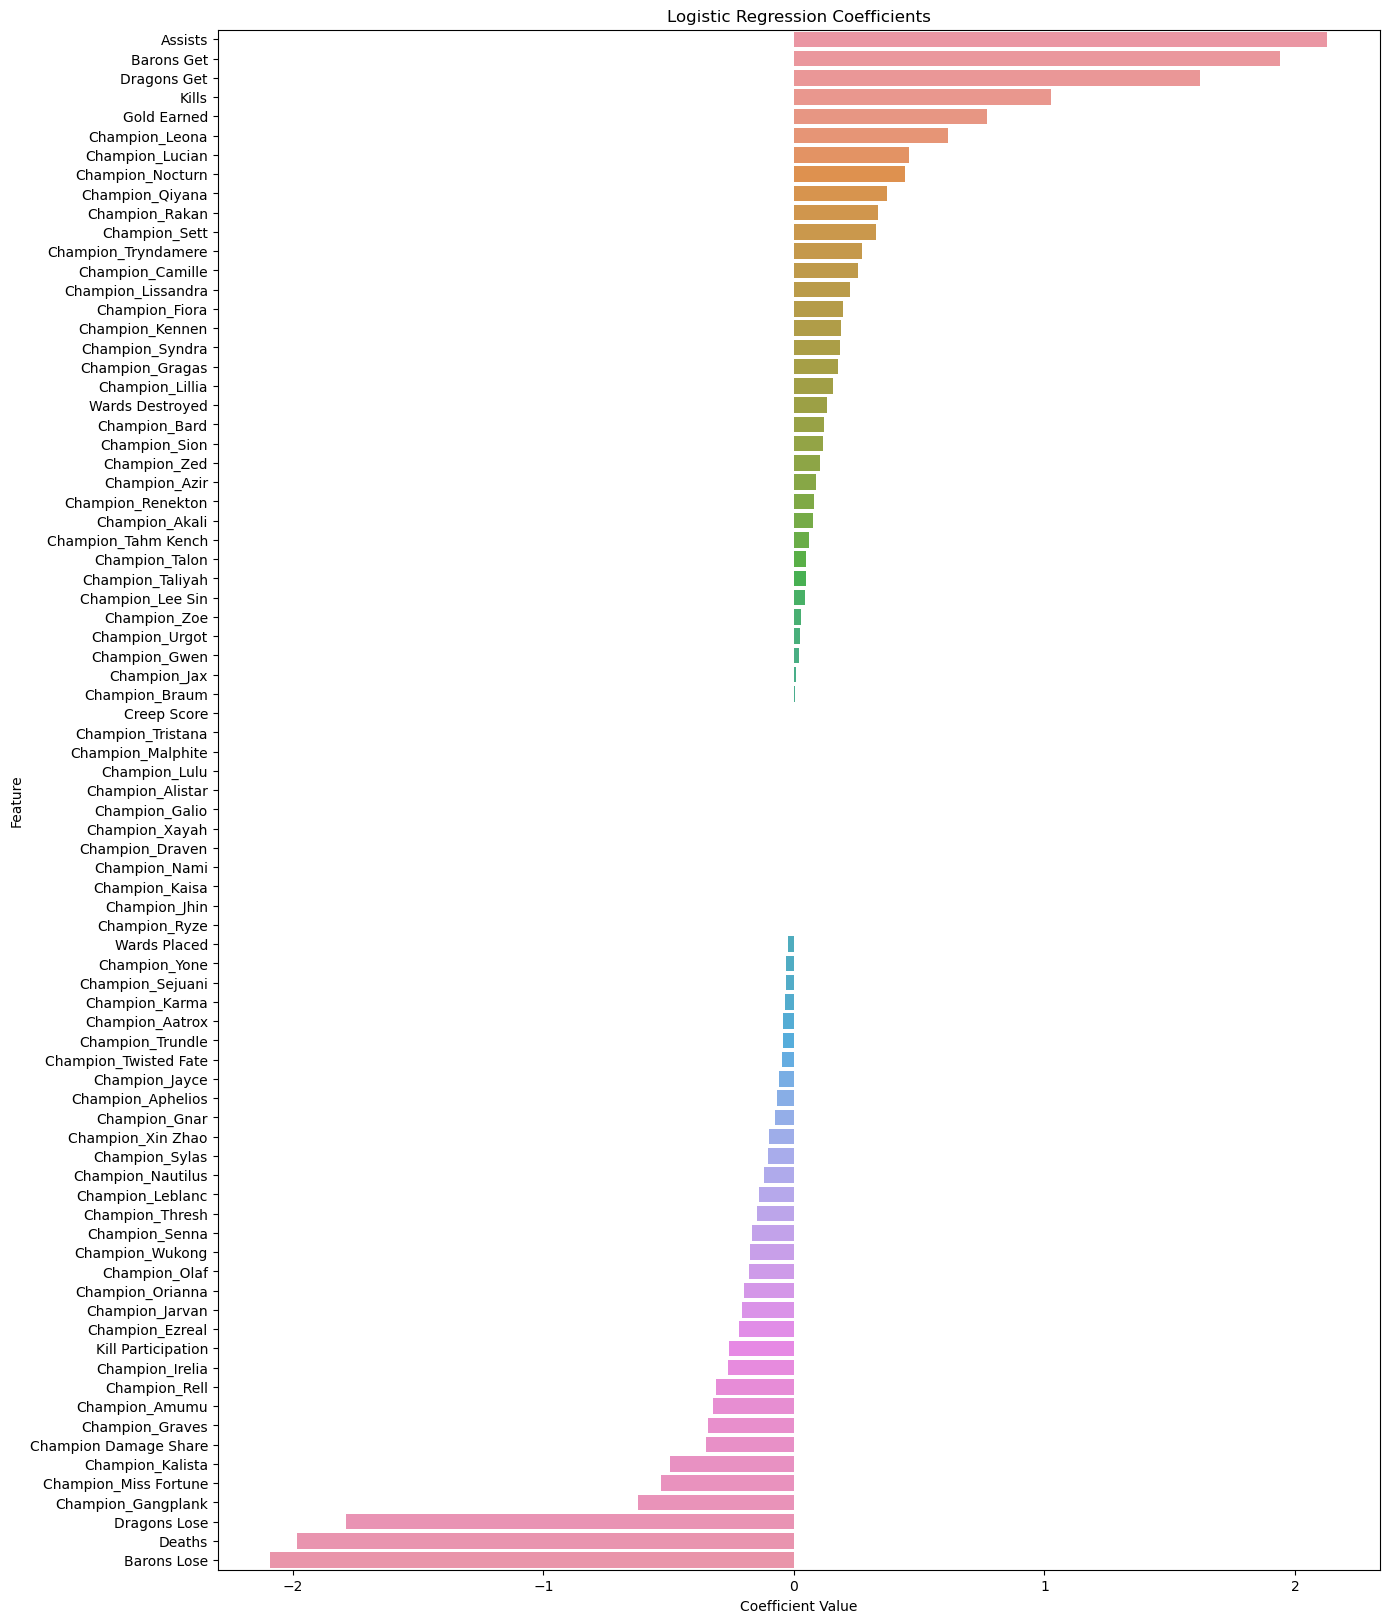

In [12]:
# Plot coefficients with sorted features
plt.figure(figsize=(15, 20))
coef_df = pd.DataFrame({'feature':X_train.columns,'coef':logreg.coef_[0]})
coef_df = coef_df.sort_values(by='coef', ascending=False)
sns.barplot(x='coef', y='feature', data=coef_df)
plt.title("Logistic Regression Coefficients")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.show()

In [13]:
from sklearn.tree import DecisionTreeClassifier
 
# Split the dataset into training and testing sets
X2 = lol_data_prep2.drop("W", axis=1)
y2 = lol_data_prep2["W"]
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42)

In [14]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

# Train a random forest classifier with 50 trees
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier to the training data
rfc.fit(X2_train, y2_train)

RandomForestClassifier(random_state=42)

In [15]:
# Make predictions on the test data
y2_pred = rfc.predict(X2_test)

# Calculate accuracy
accuracy2 = accuracy_score(y2_test, y2_pred)

# Calculate precision
precision2 = precision_score(y2_test, y2_pred)

# Calculate recall
recall2 = recall_score(y2_test, y2_pred)

# Calculate F1-score
f12 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy2)
print("Precision:", precision2)
print("Recall:", recall2)
print("F1-score:", f12)

Accuracy: 0.9696969696969697
Precision: 0.9666666666666667
Recall: 0.9666666666666667
F1-score: 0.967741935483871


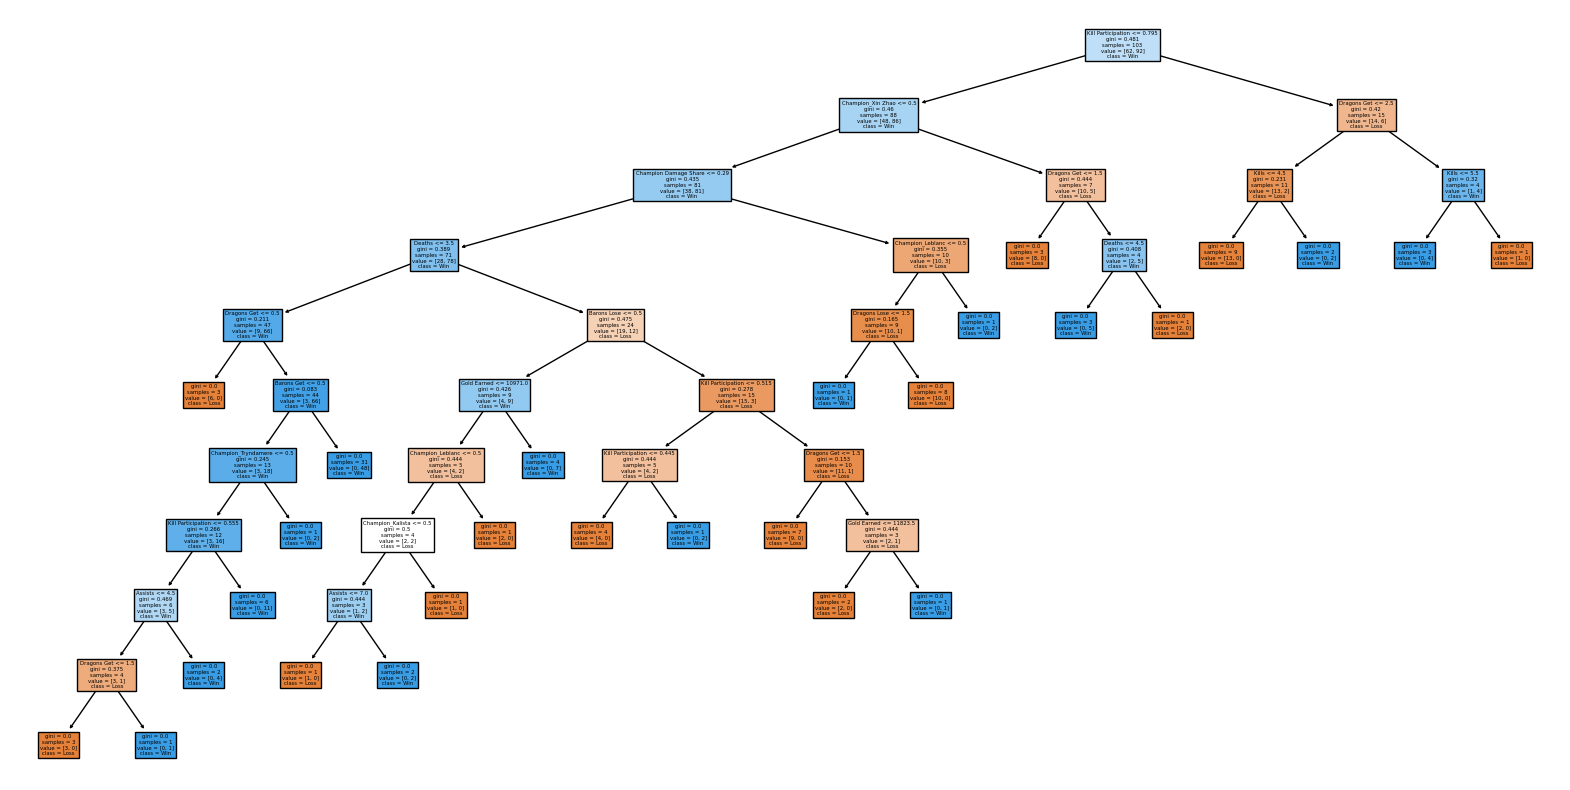

In [16]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Get the first decision tree from the random forest
dtc = rfc.estimators_[0]

# Visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(dtc, feature_names=X2.columns, class_names=["Loss", "Win"], filled=True)
plt.show()

(เนื่องจาก test และ train data มีการแบ่งแบบสุ่ม ดังนั้นกราฟ tree ที่แสดงจึงอาจมีเปลี่ยนไปจากที่พรีเซนต์ เนื่องจากเราได้มีการรันโปรแกรมใหม่)